In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt 

In [40]:
def is_outlier(points, thresh=3.5):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

In [31]:
df_train = pd.read_csv('../../not_on_git/final_classification/train_data.csv' , usecols=['name' , 'class'], index_col='name')
df_train

,class
name,
2CXO J002359.4-720438,CV
2CXO J174041.4-534004,CV
2CXO J002409.2-720543,CV
2CXO J002411.1-720620,CV
2CXO J002401.4-720441,CV
...,...
2CXO J003444.5-431554,AGN
2CXO J203606.3+422737,YSO
2CXO J131747.5+411745,AGN


In [2]:
df_clf = pd.read_csv('../../not_on_git/final_classification/all_classified.csv' , usecols=['name' , 'prob' , 'class'], index_col='name')
df_clf

,class,prob
name,,
2CXO J003935.9-732725,STAR,0.777433
2CXO J003936.7-731249,PULSAR,0.608646
2CXO J004028.7-731106,AGN,0.446212
2CXO J004506.3-730056,PULSAR,0.598368
2CXO J004659.0-731918,STAR,0.821817
...,...,...
2CXO J220433.1-495916,HMXB,0.671695
2CXO J220508.3-495935,HMXB,0.913425
2CXO J220544.0-495505,HMXB,0.801407


In [3]:
df_csc = pd.read_csv('csc-data.csv', index_col='name' , delimiter='\t')
df_csc

,flux_aper_avg_b,flux_aper_avg_h,flux_aper_avg_m,flux_aper_avg_s,flux_aper_avg_u,powlaw_stat,bb_stat,brems_stat,apec_stat,apec_z,nh_gal,hard_hm,hard_ms,hard_hs
name,,,,,,,,,,,,,,
2CXO J003935.9-732725,0.000000e+00,7.141104e-15,1.529669e-15,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,4.28,0.231106,-0.307308,-0.058713
2CXO J003936.7-731249,1.458552e-14,1.196830e-14,2.057132e-15,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,4.92,0.343535,-0.368520,-0.016240
2CXO J004028.7-731106,1.094959e-13,8.183634e-14,1.744202e-14,1.216939e-14,NaN,0.829949,1.022830,0.793730,NaN,NaN,5.01,0.269831,0.064959,0.336040
2CXO J004501.0-730958,6.496416e-14,5.308985e-14,1.067445e-14,2.292165e-15,0.000000e+00,1.103129,1.710700,1.144743,NaN,NaN,5.08,0.251093,0.356027,0.558401
2CXO J004506.3-730056,2.379848e-14,1.178519e-14,7.671868e-15,4.860946e-15,6.986833e-14,0.752863,0.743214,0.688137,NaN,NaN,5.51,-0.106184,0.042473,-0.066209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2CXO J220613.7-495727,3.077696e-14,2.516278e-14,5.466459e-15,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,1.81,-0.013741,0.233604,0.224859
2CXO J220614.6-500951,9.251573e-15,2.709156e-15,7.888780e-16,5.639704e-15,1.623124e-15,NaN,NaN,NaN,NaN,NaN,1.85,0.999375,-0.999375,-0.570893
2CXO J220618.4-500554,2.417635e-14,1.919246e-14,2.265201e-15,3.881337e-15,0.000000e+00,NaN,NaN,NaN,NaN,NaN,1.83,0.463460,-0.417239,0.056215


In [33]:
df_train_csc = pd.merge(df_train,df_csc , how='left' , left_index=True, right_index=True)
df_train_csc

,class,flux_aper_avg_b,flux_aper_avg_h,flux_aper_avg_m,flux_aper_avg_s,flux_aper_avg_u,powlaw_stat,bb_stat,brems_stat,apec_stat,apec_z,nh_gal,hard_hm,hard_ms,hard_hs
name,,,,,,,,,,,,,,,
2CXO J002359.4-720438,CV,4.812060e-16,1.058800e-16,8.998107e-17,3.895504e-16,3.991823e-16,NaN,NaN,NaN,NaN,NaN,5.28,-0.058713,-0.733292,-0.792005
2CXO J174041.4-534004,CV,7.853795e-14,2.987183e-15,NaN,5.989632e-14,2.061340e-14,1.426299,1.237370,1.104016,NaN,NaN,13.80,-0.803248,-0.694566,-0.961899
2CXO J002409.2-720543,CV,2.577176e-15,1.640933e-15,5.098716e-16,5.937113e-16,1.720191e-16,NaN,NaN,NaN,NaN,NaN,5.31,0.089944,-0.266084,-0.182386
2CXO J002411.1-720620,CV,NaN,NaN,NaN,NaN,NaN,0.744222,2.905488,0.819731,NaN,NaN,5.31,0.292317,-0.373517,-0.092442
2CXO J002401.4-720441,CV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.29,-0.999375,-0.684572,-0.999375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2CXO J003444.5-431554,AGN,1.760760e-14,1.266283e-14,1.875643e-15,3.722251e-15,NaN,NaN,NaN,NaN,NaN,NaN,2.79,0.208620,-0.247345,-0.038726
2CXO J203606.3+422737,YSO,1.075428e-14,9.460987e-15,1.197641e-15,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,137.60,0.605871,0.098688,0.999375
2CXO J131747.5+411745,AGN,6.363757e-14,2.008880e-14,1.407862e-14,3.137641e-14,1.851254e-14,NaN,NaN,NaN,NaN,NaN,1.20,-0.188632,-0.509681,-0.652092


In [4]:
df = pd.merge(df_clf,df_csc , how='left' , left_index=True, right_index=True)
df

,class,prob,flux_aper_avg_b,flux_aper_avg_h,flux_aper_avg_m,flux_aper_avg_s,flux_aper_avg_u,powlaw_stat,bb_stat,brems_stat,apec_stat,apec_z,nh_gal,hard_hm,hard_ms,hard_hs
name,,,,,,,,,,,,,,,,
2CXO J003935.9-732725,STAR,0.777433,0.000000e+00,7.141104e-15,1.529669e-15,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,4.28,0.231106,-0.307308,-0.058713
2CXO J003936.7-731249,PULSAR,0.608646,1.458552e-14,1.196830e-14,2.057132e-15,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,4.92,0.343535,-0.368520,-0.016240
2CXO J004028.7-731106,AGN,0.446212,1.094959e-13,8.183634e-14,1.744202e-14,1.216939e-14,NaN,0.829949,1.022830,0.793730,NaN,NaN,5.01,0.269831,0.064959,0.336040
2CXO J004506.3-730056,PULSAR,0.598368,2.379848e-14,1.178519e-14,7.671868e-15,4.860946e-15,6.986833e-14,0.752863,0.743214,0.688137,NaN,NaN,5.51,-0.106184,0.042473,-0.066209
2CXO J004659.0-731918,STAR,0.821817,0.000000e+00,0.000000e+00,1.259314e-15,6.172243e-16,8.098542e-14,NaN,NaN,NaN,NaN,NaN,4.70,0.151156,0.218613,0.394753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2CXO J220433.1-495916,HMXB,0.671695,0.000000e+00,0.000000e+00,5.297140e-15,6.185485e-15,0.000000e+00,NaN,NaN,NaN,NaN,NaN,1.92,0.557152,-0.567146,-0.775765
2CXO J220508.3-495935,HMXB,0.913425,7.097288e-14,5.649126e-14,5.024116e-15,7.751085e-15,0.000000e+00,NaN,NaN,NaN,NaN,NaN,1.91,0.503435,-0.495940,0.021237
2CXO J220544.0-495505,HMXB,0.801407,3.656434e-14,2.830008e-14,2.737420e-15,2.992005e-15,0.000000e+00,NaN,NaN,NaN,NaN,NaN,1.85,0.678326,-0.623360,0.131168


In [25]:
(df[df['class']=='STAR']['powlaw_stat'].isna().sum())/len(df[df['class']=='STAR'])

0.9606984851564088

In [41]:
def plot(ax , df , cl , prop, bins=50):
    for c in cl:
        avl = (df[df['class']==c][prop].isna().sum())/len(df[df['class']==c])*100
        df_plot = df[df['class']==c][prop] 
        df_plot = df_plot[~is_outlier(df_plot)]
        ax.hist(df_plot , histtype='step' , bins=bins , label= f'{c} : {avl:.1f}' , density=True)
        ax.set_xlabel(prop)
        ax.legend()
    return ax

In [27]:
import seaborn as sns

/home/kumaran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:24: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/home/kumaran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:24: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/home/kumaran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:24: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/home/kumaran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:24: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy arr

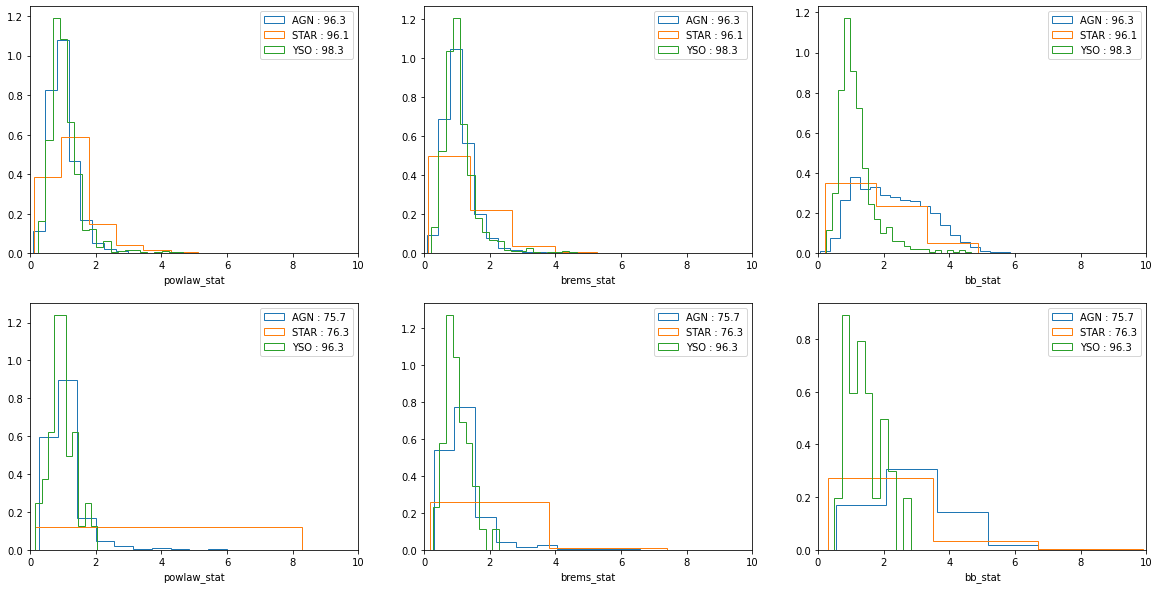

In [42]:
classes = ['AGN' , 'STAR' , 'YSO' , 'HMXB' , 'LMXB' , 'CV' ,'ULX' , 'PULSAR']
classes = ['AGN' , 'STAR' , 'YSO' , ]
fig, ax = plt.subplots(nrows=2, ncols=3 , figsize=(20,10))
ax = np.ravel(ax)
ax[0] = plot(ax[0] , df, classes , 'powlaw_stat', bins=50)
ax[0].set_xlim(0,10)
ax[1] = plot(ax[1] , df, classes , 'brems_stat', bins=50)
ax[1].set_xlim(0,10)
ax[2] = plot(ax[2] , df, classes , 'bb_stat', bins=60)
ax[2].set_xlim(0,10)

ax[3] = plot(ax[3] , df_train_csc, classes , 'powlaw_stat', bins=10)
ax[3].set_xlim(0,10)
ax[4] = plot(ax[4] , df_train_csc, classes , 'brems_stat', bins=10)
ax[4].set_xlim(0,10)
ax[5] = plot(ax[5] , df_train_csc, classes , 'bb_stat', bins=10)
ax[5].set_xlim(0,10)
plt.show()

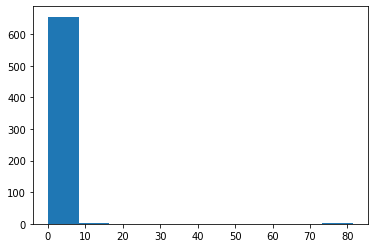

In [44]:
to_plot = df_train_csc[df_train_csc['class']=='STAR']['powlaw_stat'].to_numpy()
to_plot = to_plot[~is_outlier(to_plot)]
plt.hist(df_train_csc[df_train_csc['class']=='STAR']['powlaw_stat'])
plt.show()